<a href="https://colab.research.google.com/github/lucasuff/Vies-de-genero-em-PLN-em-portugues/blob/main/ETW2VW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
.%pip install responsibly

     |████████████████████████████████| 28.2 MB 1.6 MB/s 
     |████████████████████████████████| 12.8 MB 10.8 MB/s 
     |████████████████████████████████| 24.2 MB 1.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.5 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.5 which is incompatible.
arviz 0.11.4 requires matplotlib>=3.0, but you have matplotlib 2.2.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.

In [ ]:
%pip install -U pip setuptools wheel
%pip install -U spacy

     |████████████████████████████████| 6.0 MB 4.1 MB/s            
     |████████████████████████████████| 628 kB 20.2 MB/s            
     |████████████████████████████████| 10.1 MB 40.6 MB/s            
     |████████████████████████████████| 181 kB 58.7 MB/s            
     |████████████████████████████████| 42 kB 1.4 MB/s             
     |████████████████████████████████| 451 kB 60.8 MB/s            
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uni

In [ ]:
!pip install stylecloud

     |████████████████████████████████| 262 kB 4.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 161 kB 44.8 MB/s            
     |████████████████████████████████| 87 kB 6.4 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 87 kB 6.1 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=4903318d97f73fac6596d1c02b44b01c640782e3dc223cba9e904db020d88325
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=dba0351dc50b9b0568b9d9457ab0a6ca4fe0dce0df1a92205bb264128184d04e
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sh

In [ ]:
import spacy.cli
spacy.cli.download("pt_core_news_sm")

import spacy
nlp = spacy.load("pt_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [ ]:
import json

file = open("/content/drive/MyDrive/curso_word2vec/contents_woman.json", "r")
trip_contents = json.load(file)
file.close()

In [ ]:
file = open("/content/drive/MyDrive/curso_word2vec/elpais_woman_contents.json", "r")
elpais_contents = json.load(file)
file.close()

In [ ]:
acceptable_words = ["ADJ", "PRON", "NOUN", "PROPN", "VERB", "DET", "X"]

In [ ]:
trip_docs = list(map(lambda text : nlp(text), trip_contents)) 
elpais_docs = list(map(lambda text : nlp(text), elpais_contents)) 

In [ ]:
trip_tokenized_names = []
for doc in trip_docs:
  trip_tokenized_names.append([token.orth_.lower() for token in doc if token.pos_ in acceptable_words])

elpais_tokenized_names = []
for doc in elpais_docs:
  elpais_tokenized_names.append([token.orth_.lower() for token in doc if token.pos_ in acceptable_words])

In [ ]:
tokenized_names = trip_tokenized_names+elpais_tokenized_names

In [ ]:
from gensim.models import Word2Vec

modelo = Word2Vec(tokenized_names, size=300, min_count=1)

In [ ]:
print(modelo.wv.vocab)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(len(modelo.wv.vocab))

158640


In [ ]:
with open("/content/drive/MyDrive/curso_word2vec/vocabulary.json", "w") as f:
  f.write(json.dumps(words))

In [ ]:
modelo.most_similar("mulher")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('homem', 0.6986367106437683),
 ('pessoa', 0.682819128036499),
 ('menina', 0.6633551120758057),
 ('vítima', 0.6448701620101929),
 ('garota', 0.6304962635040283),
 ('rea-lidade', 0.6074693202972412),
 ('figura', 0.6024558544158936),
 ('jovem', 0.5973970890045166),
 ('mulheres', 0.593261182308197),
 ('palavra', 0.5882571935653687)]

In [ ]:
modelo.most_similar("homem")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sujeito', 0.7590804100036621),
 ('estereótipo', 0.747560977935791),
 ('desqualificá-lo', 0.7412887215614319),
 ('menino', 0.7133222818374634),
 ('negro', 0.7085132598876953),
 ('mulher', 0.6986366510391235),
 ('gay', 0.6945589780807495),
 ('jovem', 0.6940738558769226),
 ('puta', 0.6888861656188965),
 ('macho', 0.6856129765510559)]

## Doesnt match

In [ ]:
modelo.doesnt_match("gato girafa macaco pessoa".split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'pessoa'

In [ ]:
modelo.doesnt_match("caneta lápis borracha papel avião".split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'avião'

In [ ]:
modelo.doesnt_match("enfermeira enfermeiro advogada advogado empregada empregado engenheiro engenheira".split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'empregado'

In [ ]:
modelo.doesnt_match("sucesso dinheiro chefe homem mulher".split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'chefe'

## Most Similar

In [ ]:
modelo.most_similar(positive=["professor", "mulher"], negative=["homem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('usp', 0.7599380016326904),
 ('professora', 0.7497907876968384),
 ('psicologia', 0.7399095892906189),
 ('coordenadora', 0.7062993049621582),
 ('harvard', 0.7037403583526611),
 ('sociologia', 0.7036489248275757),
 ('pesquisadora', 0.7006822824478149),
 ('pós-graduação', 0.6902296543121338),
 ('unicamp', 0.6879696249961853),
 ('reboh', 0.6833409667015076)]

In [ ]:
modelo.most_similar(positive=["rei", "mulher"], negative=["homem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('luedji', 0.7345995306968689),
 ('gilberto', 0.7208956480026245),
 ('cirque', 0.7208788394927979),
 ('bodanzky', 0.7195290327072144),
 ('nora', 0.7190608978271484),
 ('goifman', 0.7177214622497559),
 ('muylaert', 0.713951051235199),
 ('gaby', 0.7138070464134216),
 ('moreno', 0.7128840684890747),
 ('marta', 0.7113717198371887)]

In [ ]:
modelo.most_similar(positive=["médico", "mulher"], negative=["homem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('médica', 0.6875506043434143),
 ('clínica', 0.6198185682296753),
 ('saúde', 0.5942820310592651),
 ('consentir', 0.575529158115387),
 ('licença', 0.5537155866622925),
 ('vítima', 0.5491777658462524),
 ('ocorrência', 0.5440057516098022),
 ('gravidez', 0.5420808792114258),
 ('internação', 0.5395140051841736),
 ('doméstica', 0.5368821620941162)]

In [ ]:
modelo.most_similar(positive=["chefe", "mulher"], negative=["homem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ministra', 0.6932086944580078),
 ('clécio', 0.6702167391777039),
 ('secretária', 0.661176860332489),
 ('artemis', 0.6375414133071899),
 ('assessora', 0.6347614526748657),
 ('nauert', 0.6335107088088989),
 ('secretaria', 0.6309632062911987),
 ('assumiu', 0.6306694746017456),
 ('secretário', 0.6249232292175293),
 ('titular', 0.622279703617096)]

In [ ]:
modelo.most_similar(positive=["patrão", "mulher"], negative=["homem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('furinhos</b', 0.7371601462364197),
 ('noivinha', 0.7226482629776001),
 ('guerreira', 0.7190499305725098),
 ('mina', 0.714838981628418),
 ('certidão', 0.7133393287658691),
 ('tomasse', 0.7128562927246094),
 ('seal', 0.7106159925460815),
 ('belíssima', 0.7099682092666626),
 ('mahazsandália', 0.7098920345306396),
 ('par\xadticular', 0.7078778743743896)]

In [ ]:
modelo.most_similar(positive=["futebol", "mulher"], negative=["homem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('surf', 0.559564471244812),
 ('sonoamerica', 0.5443731546401978),
 ('barra-ondina', 0.5425496101379395),
 ('cena', 0.5281643271446228),
 ('viajávamos', 0.5224781036376953),
 ('vigem', 0.5115749835968018),
 ('estoquegaleria', 0.5108984708786011),
 ('dança', 0.5092301964759827),
 ('afastada?a', 0.5062760710716248),
 ('pisado', 0.5007256269454956)]

In [ ]:
modelo.most_similar(positive=["inteligente", "mulher"], negative=["homem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mais?eu', 0.7387758493423462),
 ('magra', 0.7297752499580383),
 ('rihana', 0.7193174362182617),
 ('antenada', 0.7083109617233276),
 ('gostosa', 0.7066162824630737),
 ('caricatura', 0.7056030035018921),
 ('gorda', 0.7055440545082092),
 ('sub\xadpessoa', 0.6991771459579468),
 ('bem-feita', 0.6945693492889404),
 ('fantasia', 0.694338321685791)]

In [ ]:
modelo.most_similar(positive=["inteligente", "homem"], negative=["mulher"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('pau', 0.7748095989227295),
 ('sujeito', 0.7737823724746704),
 ('clichê', 0.770494818687439),
 ('corajoso', 0.7471023201942444),
 ('macho', 0.7369439601898193),
 ('estereótipo', 0.7301512360572815),
 ('racista', 0.7281456589698792),
 ('idiota', 0.7275968790054321),
 ('enjoou', 0.7271324992179871),
 ('bandido', 0.7237290143966675)]

## Gender Direction

In [ ]:
from responsibly.we import BiasWordEmbedding
from numpy.linalg import norm

we_genero = BiasWordEmbedding(modelo.wv, only_lower=True)

In [ ]:
fem = ['mulher', 'menina', 'esposa', 'senhora', 'irmã', 'mãe', 'avó','feminino', 'garota', 'senhora', 'prima']
masc = ['homem', 'menino', 'marido', 'senhor', 'irmão', 'pai', 'avô', 'masculino', 'garoto', 'senhor', 'primo']

we_genero._identify_direction('Femenino', 'Masculino',
                                          definitional=(fem, masc),
                                          method='sum')

In [ ]:
gender_direction = we_genero.direction

gender_direction /= norm(gender_direction)

In [ ]:
modelo = modelo.wv

In [ ]:
gender_direction @ modelo.word_vec('arquiteta')

0.297043

In [ ]:
gender_direction @ modelo.word_vec('arquiteto')

-0.18939553

In [ ]:
gender_direction @ modelo.word_vec('médica')

0.27367505

In [ ]:
gender_direction @ modelo.word_vec('médico')

-0.26876405

In [ ]:
gender_direction @ modelo.word_vec('pediatra')

-0.23743224

In [ ]:
gender_direction @ modelo.word_vec('dermatologista')

0.31582555

In [ ]:
gender_direction @ modelo.word_vec('psiquiatra')

-0.1318226

In [ ]:
gender_direction @ modelo.word_vec('ginecologista')

0.12754609

In [ ]:
gender_direction @ modelo.word_vec('jogadora')

0.067330584

In [ ]:
gender_direction @ modelo.word_vec('jogador')

-0.42299122

In [ ]:
gender_direction @ modelo.word_vec('professora')

0.30246302

In [ ]:
gender_direction @ modelo.word_vec('professor')

-0.29334033

In [ ]:
gender_direction @ modelo.word_vec('arquiteto')

-0.18939553

In [ ]:
gender_direction @ modelo.word_vec('engenharia')

0.032418158

In [ ]:
gender_direction @ modelo.word_vec('medicina')

0.03905979

In [ ]:
gender_direction @ modelo.word_vec('física')

0.036295075

In [ ]:
gender_direction @ modelo.word_vec('enfermagem')

0.10657154

In [ ]:
gender_direction @ modelo.word_vec('futebol')

-0.30892152

In [ ]:
gender_direction @ modelo.word_vec('vôlei')

-0.023668028

In [ ]:
gender_direction @ modelo.word_vec('natação')

-0.03264129

In [ ]:
gender_direction @ modelo.word_vec('ginástica')

0.23496124

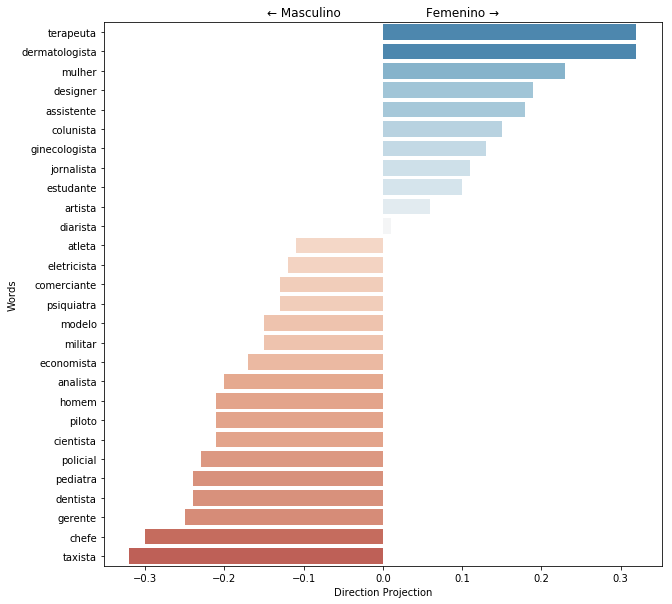

In [ ]:
profissoes_neutras = [
    'chefe',
    'colunista',
    'assistente',
    'taxista',
    'psiquiatra',
    'policial',
    'dentista',
    'eletricista',
    'economista',
    'atleta',
    'terapeuta',
    'piloto',
    'modelo',
    'estudante',
    'comerciante',
    'militar',
    'cientista',
    'designer',
    'gerente',
    'artista',
    'analista',
    'jornalista',
    'diarista',
    "pediatra",
    'psiquiatra',
    'dermatologista',
    'ginecologista'
]

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    profissoes_neutras + fem[:1] + masc[:1],
    n_extreme=20,
    ax=ax);

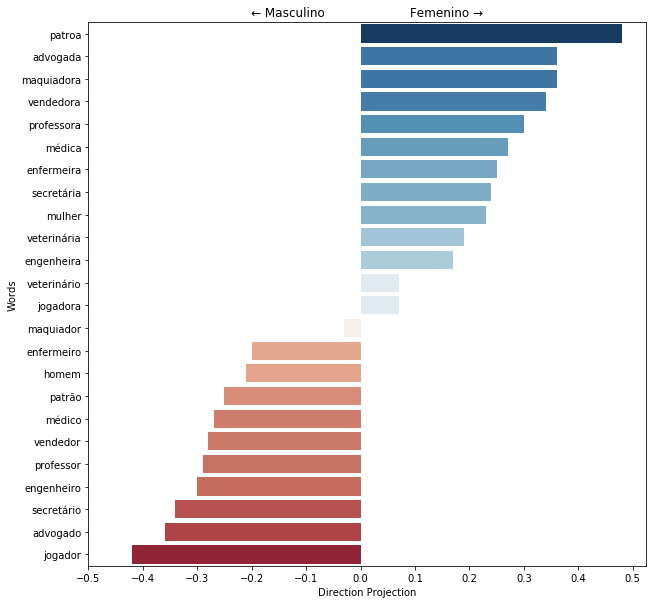

In [ ]:
profissoes_nao_neutras = [
    'médico',
    'médica',
    'professor',
    'professora',
    'engenheiro',
    'engenheira',
    'patrão',
    'patroa',
    'secretário',
    'secretária',
    'advogado',
    'advogada',
    'enfermeira',
    'enfermeiro',
    'maquiador',
    'maquiadora',
    'jogador',
    'jogadora',
    'vendedor',
    'vendedora',
    'veterinária',
    'veterinário'
]

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    profissoes_nao_neutras + fem[:1] + masc[:1],
    n_extreme=20,
    ax=ax);

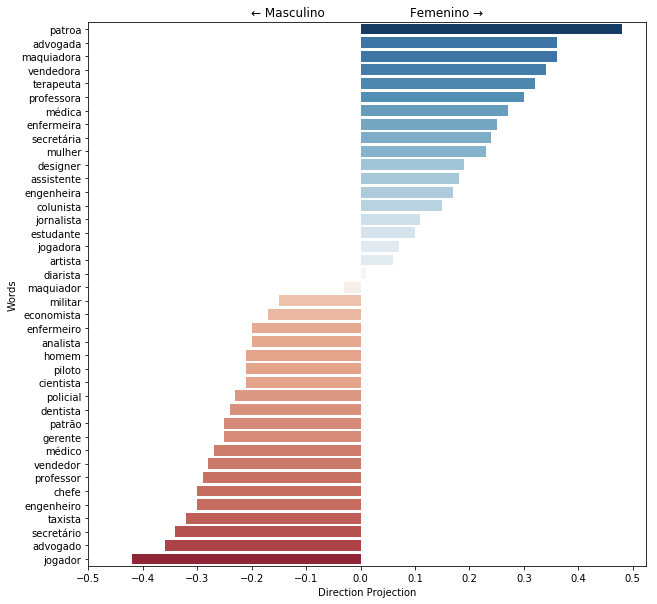

In [ ]:
profissoes = [
    'médico',
    'médica',
    'professor',
    'professora',
    'engenheiro',
    'engenheira',
    'patrão',
    'patroa',
    'secretário',
    'secretária',
    'advogado',
    'advogada',
    'enfermeira',
    'enfermeiro',
    'maquiador',
    'maquiadora',
    'jogador',
    'jogadora',
    'vendedor',
    'vendedora',
    'chefe',
    'colunista',
    'assistente',
    'taxista',
    'psiquiatra',
    'policial',
    'dentista',
    'eletricista',
    'economista',
    'atleta',
    'terapeuta',
    'piloto',
    'modelo',
    'estudante',
    'comerciante',
    'militar',
    'cientista',
    'designer',
    'gerente',
    'artista',
    'analista',
    'jornalista',
    'diarista'
]

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    profissoes + fem[:1] + masc[:1],
    n_extreme=20,
    ax=ax);

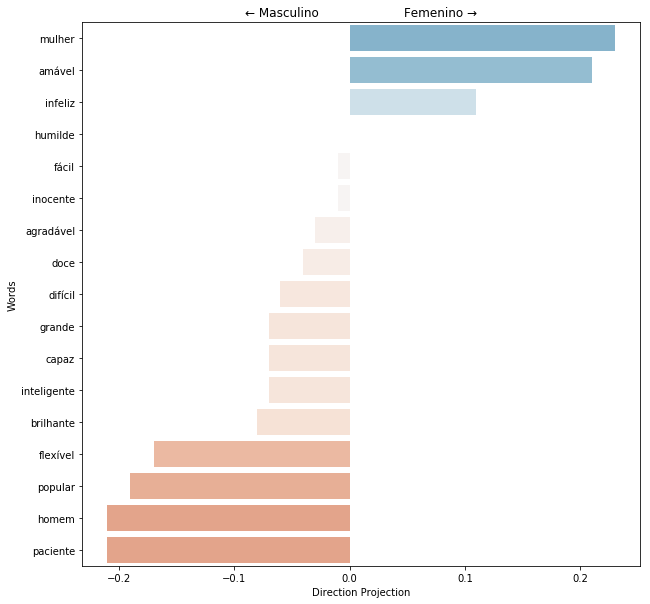

In [ ]:
adjetivos = [
    'inteligente',
    'humilde',
    'amável',
    'doce',
    'paciente',
    'popular',
    'flexível',
    'grande',
    'brilhante',
    'inocente',
    'fácil',
    'agradável',
    'infeliz',
    'capaz',
    'difícil'
]

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    adjetivos + fem[:1] + masc[:1],
    n_extreme=20,
    ax=ax);

## Trabalhando com frases

In [ ]:
import nltk
import string
nltk.download('punkt')

def tokenizer(text):
  text = text.lower()
  alphanumeric_list = []

  for valid_token in nltk.word_tokenize(text):
    if valid_token in string.punctuation: continue
    alphanumeric_list.append(valid_token)

  return alphanumeric_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import numpy as np
def vectors_combination_by_sum(words_numbers): 
  result = np.zeros(300)

  for wn in words_numbers:
    result += modelo.get_vector(wn)

  return result

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("ela uma médica"))
gender_direction @ phrase_vector

0.4225195153854301

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("ele médico"))
gender_direction @ phrase_vector

-0.4747751644129483

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("brinca boneca"))
gender_direction @ phrase_vector

0.4322412502899068

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("brinca boneco"))
gender_direction @ phrase_vector

-0.19238906517315343

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("profissional sucesso"))
gender_direction @ phrase_vector

-0.3293687344533657

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("lidera time"))
gender_direction @ phrase_vector

-0.6118033569776358

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("limpa casa"))
gender_direction @ phrase_vector

0.30002820213996656

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("joga futebol"))
gender_direction @ phrase_vector

-0.34550134046372755

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("joga vôlei"))
gender_direction @ phrase_vector

-0.060247841745457734

In [ ]:
# !!!
phrase_vector = vectors_combination_by_sum(tokenizer("estudante medicina"))
gender_direction @ phrase_vector

0.13704123208482705

In [ ]:
# !!!
phrase_vector = vectors_combination_by_sum(tokenizer("estudante engenharia"))
gender_direction @ phrase_vector

0.1303996186042914

In [ ]:
# !!!
phrase_vector = vectors_combination_by_sum(tokenizer("estudante enfermagem"))
gender_direction @ phrase_vector

0.2045529879247768

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("especialista assunto"))
gender_direction @ phrase_vector

-0.29039663726070114

In [ ]:
phrase_vector = vectors_combination_by_sum(tokenizer("especialista área"))
gender_direction @ phrase_vector

0.04466802381559776

In [ ]:
import stylecloud
%matplotlib inline
def ciyun(res, name, style):#RES word vector output Correlation The highest word Name Save file name style word cloud picture style settings
    result=''
    for each in res:
        result=result+' '+str(each[0])
    stylecloud.gen_stylecloud(
        text=result, # The result of the above word is passed to the text parameters
        size=512,
        # font_path = 'msyh.ttc', #      
        palette='cartocolors.qualitative.Pastel_7', #      , select from PaletTable
        gradient='horizontal', #              
        icon_name=style,  #    , select from Font Awesome
        output_name=name+".png"
        ) #        

In [ ]:
sum_vector = vectors_combination_by_sum(tokenizer("diarista chefe colunista assistente taxista psiquiatra policial dentista eletricista economista atleta terapeuta piloto modelo estudante comerciante militar cientista designer gerente artista analista jornalista diarista pediatra psiquiatra dermatologista ginecologista médico médica engenheiro engenheira advogado advogada empregado empregada"))
similar_words = modelo.similar_by_vector(sum_vector, topn=1500)

In [ ]:
f = []
m = []
for t in similar_words:
  t = list(t)
  if not "ex" in t[0] and len(t[0])>3 and len(list(nlp(t[0]).ents))==0:
    t[1] *= gender_direction @ modelo[t[0]]
    if t[1] > 0:
      f += [tuple(t)]
    else:
      t[1] -= 1
      m += [tuple(t)]
    

In [ ]:
f.sort(key=lambda tup: tup[1])
f.reverse() 

m.sort(key=lambda tup: tup[1])
m.reverse() 

In [ ]:
ciyun(f, "mulher_sem_nomes",'fas fa-book-open')

In [ ]:
ciyun(m, "homem_sem_nomes",'fas fa-book-open')